# PISA Data Exploration
## by Zora Schärer

## Preliminary Wrangling

This document explores the PISA study of 2012 with data of about 485.000 students of 68 countries around the world. The variables represent information about the students and their attitudes, their school performance, their background and their schools.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

%matplotlib inline

In [2]:
# load data
start = time.time()
df_pisa = pd.read_csv('PISA2012.csv', encoding='latin-1', index_col=0, dtype='unicode')
end = time.time()
print('Elapsed time: {} minutes'.format((end-start)/60))

Elapsed time: 3.0753960847854613 minutes


In [3]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: object(635)
memory usage: 2.3+ GB


In [4]:
# create a subset of the data for analysis (see explanation below)
pisa_explore = df_pisa[['PV1MATH','PV1READ','PV1SCIE','ST04Q01','GRADE','ATSCHL','BELONG','PERSEV','OPENPS',
         'ESCS','HISCED','WEALTH','CNT','DISCLIMA','ICTSCH','STUDREL','LMINS','MMINS','SMINS']]
pisa_explore.rename(columns = {'PV1MATH':'math_pv', 'PV1READ':'reading_pv', 'PV1SCIE':'science_pv',
                              'ST04Q01':'gender', 'GRADE':'rel_grade', 'ATSCHL':'attitude_school',
                              'BELONG':'belonging_school', 'PERSEV':'perseverance', 'OPENPS':'problem_solving',
                              'ESCS':'status', 'HISCED':'parents_edu', 'WEALTH':'wealth',
                              'CNT':'country', 'DISCLIMA':'discipl_climate', 'ICTSCH':'ICT_school',
                              'STUDREL':'teacher_student_rel', 'LMINS':'l_learning', 'MMINS':'m_learning',
                              'SMINS':'s_learning'}, inplace = True)
pisa_explore.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,math_pv,reading_pv,science_pv,gender,rel_grade,attitude_school,belonging_school,perseverance,problem_solving,status,parents_edu,wealth,country,discipl_climate,ICT_school,teacher_student_rel,l_learning,m_learning,s_learning
1,406.8469,249.5762,341.7009,Female,0,-2.31,-1.18,-0.3407,0.0521,NaN,"ISCED 3A, ISCED 4",-2.92,Albania,1.85,NaN,-1.04,NaN,NaN,NaN
2,486.1427,406.2936,548.9929,Female,0,NaN,NaN,1.3116,-0.9492,NaN,"ISCED 5A, 6",0.69,Albania,NaN,NaN,NaN,315,270,90
3,533.2684,401.21,499.6643,Female,-1,NaN,NaN,0.9918,0.9383,NaN,"ISCED 5A, 6",-0.23,Albania,NaN,NaN,NaN,300,NaN,NaN
4,412.2215,547.363,438.6796,Female,-1,NaN,NaN,NaN,NaN,NaN,"ISCED 5A, 6",-1.17,Albania,1.8,NaN,NaN,135,135,90
5,381.9209,311.7707,361.5628,Female,-1,1.38,2.63,1.0819,1.2387,NaN,"ISCED 3A, ISCED 4",-1.17,Albania,-0.08,NaN,-0.02,NaN,NaN,NaN


In [5]:
pisa_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   math_pv              485490 non-null  object
 1   reading_pv           485490 non-null  object
 2   science_pv           485490 non-null  object
 3   gender               485490 non-null  object
 4   rel_grade            484617 non-null  object
 5   attitude_school      312584 non-null  object
 6   belonging_school     313399 non-null  object
 7   perseverance         313172 non-null  object
 8   problem_solving      312766 non-null  object
 9   status               473648 non-null  object
 10  parents_edu          473091 non-null  object
 11  wealth               479597 non-null  object
 12  country              485490 non-null  object
 13  discipl_climate      314777 non-null  object
 14  ICT_school           297995 non-null  object
 15  teacher_student_rel  313860 non-nu

In [6]:
# change data type of numerical variables
num_vars = ['math_pv','reading_pv','science_pv','rel_grade','attitude_school', 'belonging_school',
                'perseverance', 'problem_solving', 'status', 'wealth', 'discipl_climate', 
                 'ICT_school', 'teacher_student_rel', 'l_learning', 'm_learning', 's_learning'] # numerical variables
pisa_explore[num_vars] = pisa_explore[num_vars].astype('float')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [7]:
pisa_explore.describe()

,math_pv,reading_pv,science_pv,rel_grade,attitude_school,belonging_school,perseverance,problem_solving,status,wealth,discipl_climate,ICT_school,teacher_student_rel,l_learning,m_learning,s_learning
count,485490.000000,485490.000000,485490.000000,484617.000000,312584.000000,313399.000000,313172.000000,312766.000000,473648.000000,479597.00000,314777.000000,297995.000000,313860.000000,282866.000000,283303.000000,270914.000000
mean,469.621653,472.004640,475.769824,-0.162964,0.051644,-0.022259,0.140125,0.038895,-0.265546,-0.33701,-0.002501,-0.065411,0.123262,219.276636,226.007056,211.122460
std,103.265391,102.505523,101.464426,0.655558,1.002942,0.983503,0.996012,0.998720,1.131791,1.21530,0.993017,1.048941,1.029343,97.997730,97.448421,131.368322
min,19.792800,0.083400,2.648300,-3.000000,-2.990000,-3.690000,-4.053000,-3.633300,-5.950000,-6.65000,-2.480000,-2.803800,-3.110000,0.000000,0.000000,0.000000
25%,395.318600,403.600700,404.457300,0.000000,-0.640000,-0.740000,-0.340700,-0.543300,-1.000000,-1.04000,-0.710000,-0.753800,-0.480000,165.000000,180.000000,120.000000
50%,466.201900,475.455000,475.699400,0.000000,-0.240000,-0.150000,0.051100,0.052100,-0.190000,-0.30000,-0.080000,-0.083600,-0.020000,200.000000,220.000000,180.000000
75%,541.057800,544.502500,547.780700,0.000000,0.770000,0.560000,0.479500,0.463900,0.610000,0.43000,0.810000,0.542300,0.810000,250.000000,250.000000,270.000000
max,962.229300,904.802600,903.338300,3.000000,2.350000,2.630000,3.528600,2.446500,3.690000,3.25000,1.850000,2.826100,2.160000,2400.000000,3000.000000,2975.000000


In [8]:
pisa_explore.parents_edu.value_counts()

ISCED 5A, 6          159942
ISCED 3A, ISCED 4    123304
ISCED 5B              74131
ISCED 2               51506
ISCED 3B, C           30469
ISCED 1               25284
None                   8455
Name: parents_edu, dtype: int64

In [9]:
# convert parent_edu into ordered categorical type
parents_edu_order = ['None','ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, ISCED 4','ISCED 5B','ISCED 5A, 6']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = parents_edu_order)
pisa_explore.loc[:,'parents_edu'] = pisa_explore.loc[:,'parents_edu'].astype(ordered_var)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
pisa_explore.to_csv('pisa_explore.csv', index = False)

### What is the structure of your dataset?

The dataset has 485.490 observations and 635 variables collected in 2012. The first part of the variables hold the raw answers to the student questionnaire. The second part of the variables are so called indices, derived from the questionnaire answers (see https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf). The last part are the plausible values and student weights. For each area (mathematics, reading, science), there are five plausible values (PVs). "For [a] given area all five values PV1- PV5 are just independent estimations of the student performance in [that] given area. For exploration it is fine to use only PV1." (http://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm)

### What is/are the main feature(s) of interest in your dataset?

I will use the first PV of each of the three areas as the dependent variables (PV1MATH, PV1READ, PV1SCIE). I am most interested to find out what variables affect these measures for the students' performance. I renamed these variables to `math_pv`, `reading_pv`, `science_pv`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

After looking through the PISA data dictionary and the [PISA Technical Report](https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf), I chose to use the indices listed below as independent variables and explore their relationship with the PVs and with each other. To make the data handling easier, I created a new data frame with only these variables: `pisa_explore`. I re-named the variables as shown in parentheses in the list below.
* Student characteristics
    * ST04Q01	Gender (`gender`)
    * GRADE	    Grade compared to modal grade in country (`rel_grade`)
    * ATSCHL	Attitude towards School: Learning Outcomes (`attitude_school`)
    * BELONG	Sense of Belonging to School (`belonging_school`)
    * PERSEV	Perseverance (`perseverance`)
    * OPENPS	Openness for Problem Solving (`problem_solving`)
* Social/family background
    * ESCS	    Index of economic, social and cultural status (`status`)
    * HISCED	Highest educational level of parents (`parents_edu`)
    * WEALTH	Wealth (`wealth`)
* School characteristics
    * CNT	    Country code 3-character (`country`)
    * DISCLIMA	Disciplinary Climate (`discipl_climate`)
    * ICTSCH	ICT Availability at School (`ICT_school`)
    * STUDREL	Teacher Student Relations (`teacher_student_rel`)
    * LMINS	    Learning time (minutes per week) -  Language (`l_learning`)
    * MMINS	    Learning time (minutes per week) - Mathematics (`m_learning`)
    * SMINS	    Learning time (minutes per week) - Science (`s_learning`)

## Univariate Exploration

In [11]:
# Define function for plotting histograms with reasonable bin size and log-transformation option
def plot_hist(x, bin_size, scale = 'lin'):
    if scale == 'lin':
        b = np.arange(x.min(),x.max()+bin_size, bin_size);
    elif scale == 'log':
        if x.min() == 0:
            min_val = 1
        b = 10 ** np.arange(np.log10(min_val),np.log10(x.max())+bin_size, bin_size);
        plt.xscale('log')
        plt.xticks([10, 20, 30, 50, 100, 200, 300, 500, 1000, 3000], ['10', '20', '30', '50', '100', '200', '300', '500 ','1000','3000'])
        plt.xlim((10, 3000))
    plt.hist(x, bins = b);
    plt.ylabel('Count');

### Dependent variables

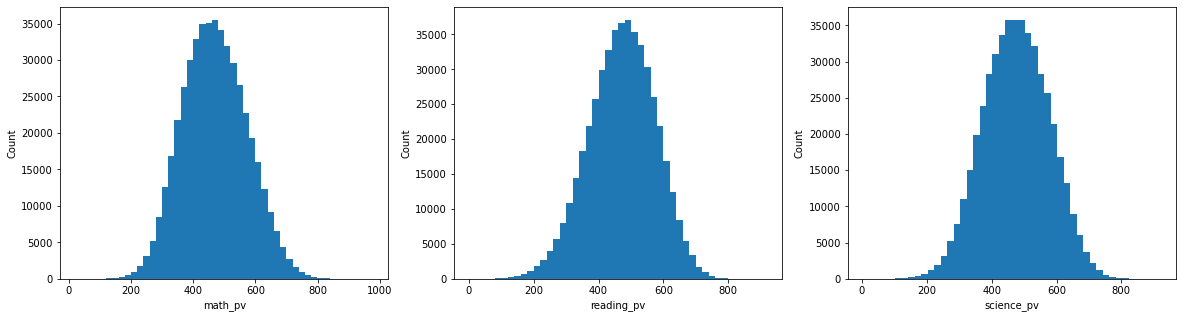

In [12]:
plt.figure(figsize = [20, 5])
# math_pv
plt.subplot(1,3,1)
plot_hist(pisa_explore.math_pv, 20)
plt.xlabel('math_pv');
# reading_pv
plt.subplot(1,3,2)
plot_hist(pisa_explore.reading_pv, 20)
plt.xlabel('reading_pv');
# science_pv
plt.subplot(1,3,3)
plot_hist(pisa_explore.science_pv, 20)
plt.xlabel('science_pv');

The histograms of the dependent variables shown above reveal that they are all normally distributed and have very similar ranges. The slope to the upper extreme values is slightly steeper than the slope to the lower extremes, i.e. there are slightly more students with very low performance in the examinated areas.

### Independent variables

##### Student characteristics

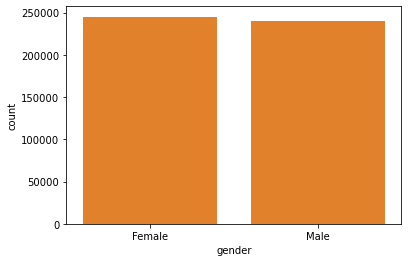

In [13]:
# gender
col = sb.color_palette()[1]
sb.countplot(data = pisa_explore, x = 'gender', color = col);

Females and males are approximately equally distributed in this dataset.

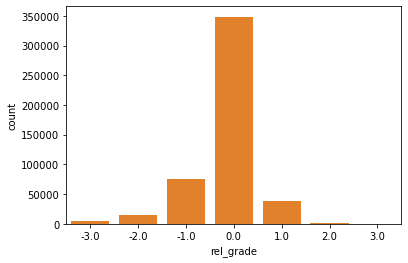

In [14]:
# rel_grade
sb.countplot(data = pisa_explore, x = 'rel_grade', color = col);

This plot shows that most students had average grades compared to their fellow students, with slightly more students performing worse than average and not better than average.

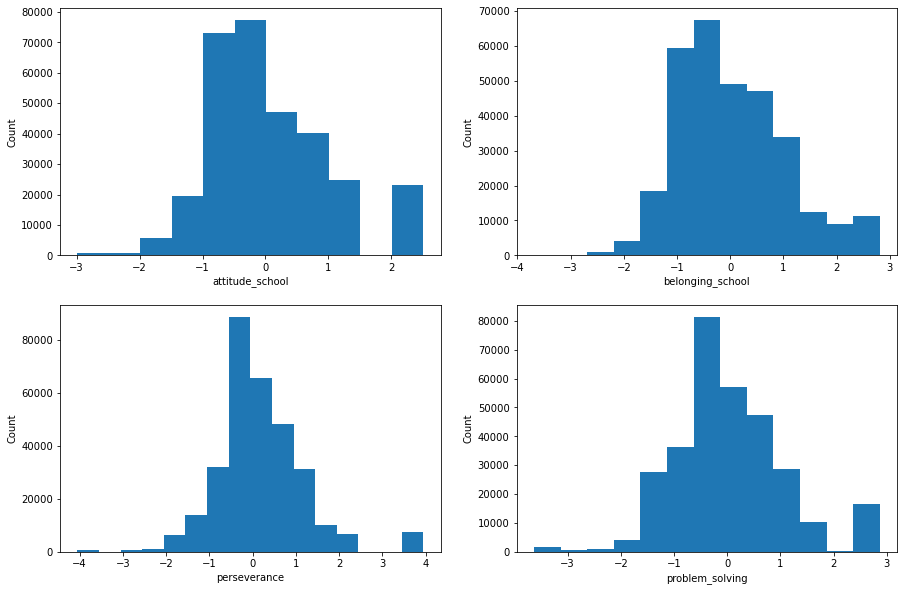

In [15]:
# attitude_school, belonging_school, perseverance, problem_solving
plt.figure(figsize = [15, 10])
# attitude_school
plt.subplot(2,2,1)
plot_hist(pisa_explore.attitude_school, .5)
plt.xlabel('attitude_school');
# belonging_school
plt.subplot(2,2,2)
plot_hist(pisa_explore.belonging_school, .5)
plt.xlabel('belonging_school');
# perseverance
plt.subplot(2,2,3)
plot_hist(pisa_explore.perseverance, .5)
plt.xlabel('perseverance');
# problem_solving
plt.subplot(2,2,4)
plot_hist(pisa_explore.problem_solving, .5)
plt.xlabel('problem_solving');

The distributions for the students' disposition regarding school are have similar distributions: they are almost normally distributed but the mid-positive values have slightly higher counts than the mid-negative values. Additionally, there is a slight "mode" at extremely positive values. 

##### Social/family background

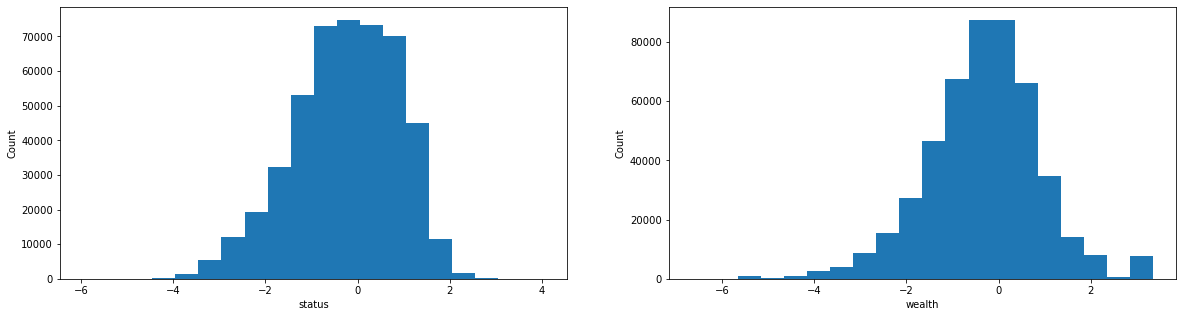

In [16]:
# status, wealth
plt.figure(figsize = [20, 5])
# status
plt.subplot(1,2,1)
plot_hist(pisa_explore.status, .5)
plt.xlabel('status');
# wealth
plt.subplot(1,2,2)
plot_hist(pisa_explore.wealth, .5)
plt.xlabel('wealth');

The distributions for status and wealth are both slightly but not left-skewed. This implies that there are more students with extremely low status and wealth compared to extremely high status and wealth.

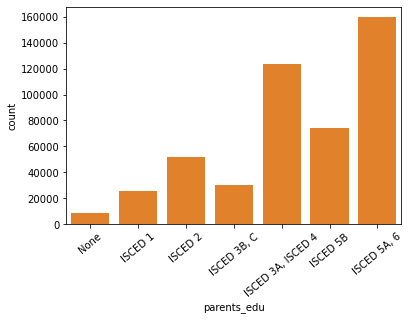

In [17]:
# parents_edu
sb.countplot(data = pisa_explore, x = 'parents_edu', color = col);
plt.xticks(rotation=40);

Neglegting ISCED levels 3B and 5B, it can be seen that the amount of highest education level of parents increases from low ('None') to high ('ISCED 5A, 6). Levels 3B and 5B are comparable to levels 3A and 5A but they are related to vocational training and technical colleges. As the counts for 3A and 5A are higher, it appears that most adults have a more academically oriented education.

##### School characteristics

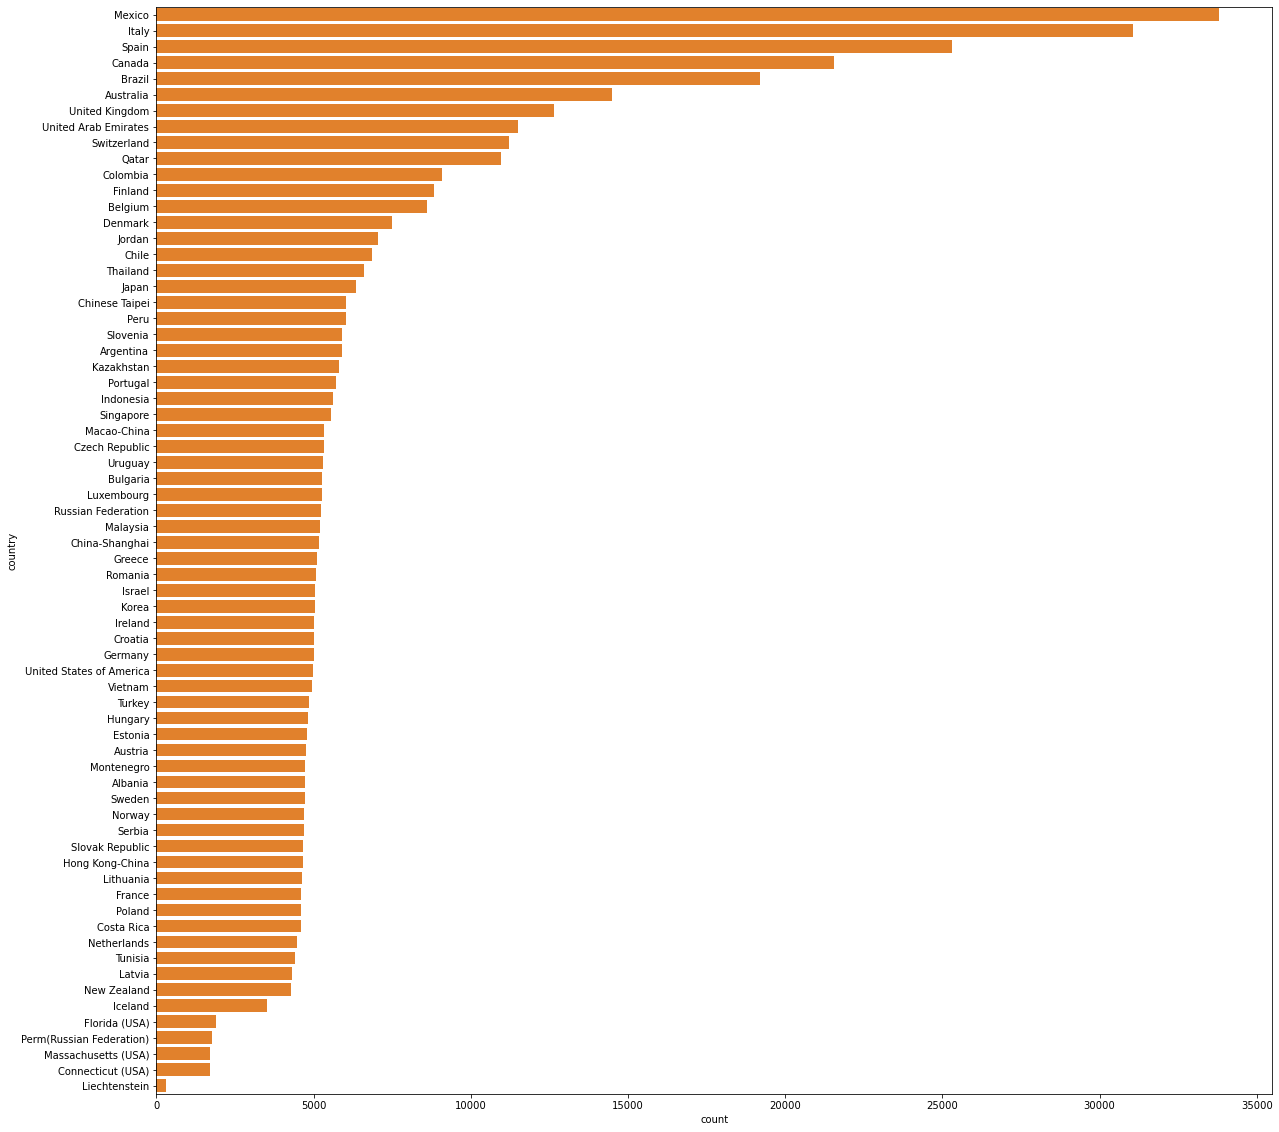

In [18]:
# country
country_order = pisa_explore.country.value_counts().index
plt.figure(figsize = [20, 20])
sb.countplot(data = pisa_explore, y = 'country', color = col, order = country_order);

The barplot of the countries in the dataset shows that there is a similar amount of data for most countries. Only about 14 countries have considerably more data. This makes sense for large countries such as Mexico or Brazil, but there are also some smaller countries with a lot of data, such as Switzerland or Belgium. This will probably not influence the furthrer analysis but it should nevertheless be kept in mind.\
A further point to be noticed is that there is separate data for some US states, a Russian state and different parts of China. I will change the country values of those entries to 'United States of America', 'Russian Federation' and 'China' respectively.

In [19]:
# change country values of US, Russian and Chinese states
usa = pisa_explore.country.str.extract('(USA)').dropna()
pisa_explore.loc[usa.index, 'country'] = 'United States of America'
china = pisa_explore.country.str.extract('(Chin)').dropna()
pisa_explore.loc[china.index, 'country'] = 'China'
russia = pisa_explore.country.str.extract('(Russian Federation)').dropna()
pisa_explore.loc[russia.index, 'country'] = 'Russian Federation'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [20]:
# save the updated data frame
pisa_explore.to_csv('pisa_explore.csv', index = False)

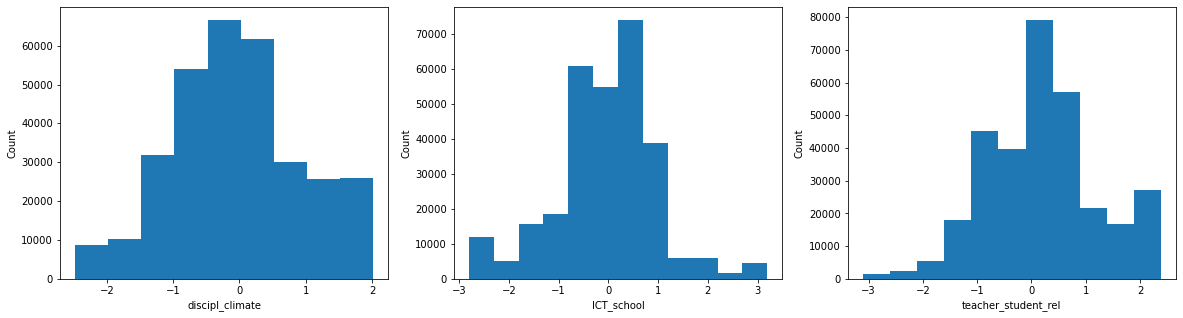

In [21]:
# discipl_climate, ICT_school, teacher_student_rel
plt.figure(figsize = [20, 5])
# discipl_climate
plt.subplot(1,3,1)
plot_hist(pisa_explore.discipl_climate, .5)
plt.xlabel('discipl_climate');
# ICT_school
plt.subplot(1,3,2)
plot_hist(pisa_explore.ICT_school, .5)
plt.xlabel('ICT_school');
# teacher_student_rel
plt.subplot(1,3,3)
plot_hist(pisa_explore.teacher_student_rel, .5)
plt.xlabel('teacher_student_rel');

The distribution of the disciplinary climate at school is approximatly bi-modal with one peak around 0 and another lower one between 1 and 2, implying more schools with positive climates. The histogram of the availabilty of ICT at schools shows two larger modes bewtween -1 and 0 and between 0 and 1 respectively. Furhtermore, there is a small peak between -3 and -3, implying that there is a considerable amount of schools with almost no ICT devices availabel for students. The distribution of the student-teacher realationship has a high peak slightly above 0, i.e. a positive relationship. Two furhter modes can be found around -1 and around 2. 

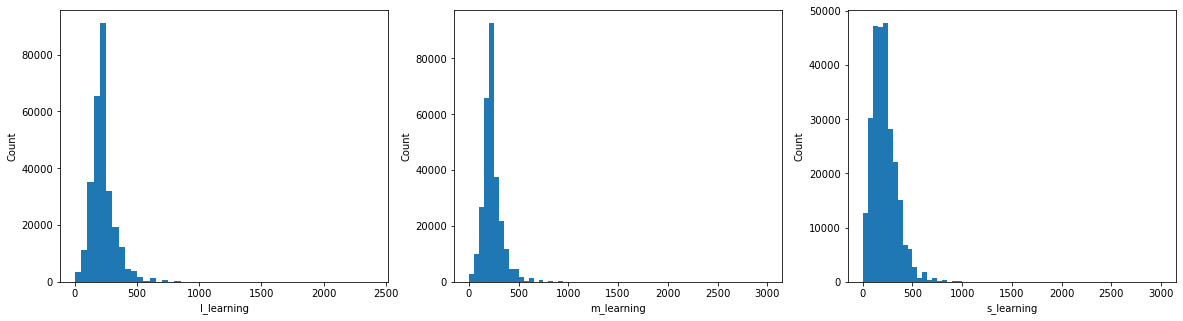

In [22]:
# l_learning, m_learning, s_learning
plt.figure(figsize = [20, 5])
# l_learning
plt.subplot(1,3,1)
plot_hist(pisa_explore.l_learning, 50)
plt.xlabel('l_learning');
# m_learning
plt.subplot(1,3,2)
plot_hist(pisa_explore.m_learning, 50)
plt.xlabel('m_learning');
# s_learning
plt.subplot(1,3,3)
plot_hist(pisa_explore.s_learning, 50)
plt.xlabel('s_learning');

These distributions show a long tail to the right, so I will try a log-transformation below.

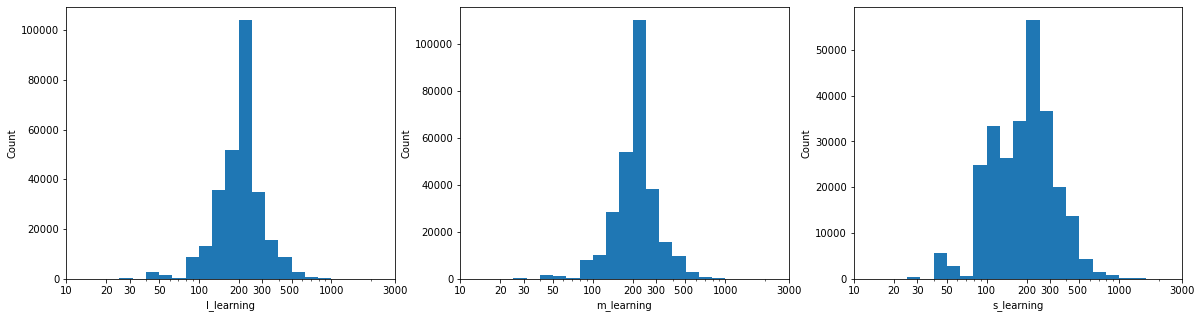

In [23]:
# l_learning, m_learning, s_learning with log-transformation
plt.figure(figsize = [20, 5])
# l_learning
plt.subplot(1,3,1)
plot_hist(pisa_explore.l_learning, .1, scale = 'log')
plt.xlabel('l_learning');
# m_learning
plt.subplot(1,3,2)
plot_hist(pisa_explore.m_learning, .1, scale = 'log')
plt.xlabel('m_learning');
# s_learning
plt.subplot(1,3,3)
plot_hist(pisa_explore.s_learning, .1, scale = 'log')
plt.xlabel('s_learning');

The log-transformations reveal a normal distribution for the learning time in language and mathematics (average is about 220 minutes per week). The science learning time shows one large mode between 200 and 300 minutes and a smaller mode around 120 minutes. All three distributions have a small but visible elevation at 50 minutes - this might be the average time of one school lesson.\
There are a few very small values (minimum is 0), so the x-axes are limited to values between 10 and 3000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The three dependent variables are normally distributed and show no unusual points.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Most independent variables show no unusual distribution or values. In the country tags there were a few states in the USA and Russia that had extra entries. I cleaned this issue by changing the entries to 'United States of America' and 'Russian Federation'. The distributions of the learning times had very long tails to the right so I applied a log-transformation. 

## Bivariate Exploration

I will start with looking at the relationship between the numerical variables.

In [24]:
num_vars = ['math_pv','reading_pv','science_pv','rel_grade','attitude_school', 'belonging_school',
                'perseverance', 'problem_solving', 'status', 'wealth', 'discipl_climate', 
                 'ICT_school', 'teacher_student_rel', 'l_learning', 'm_learning', 's_learning'] # numerical variables
cat_vars = ['gender', 'country', 'parents_edu'] # categorical variables

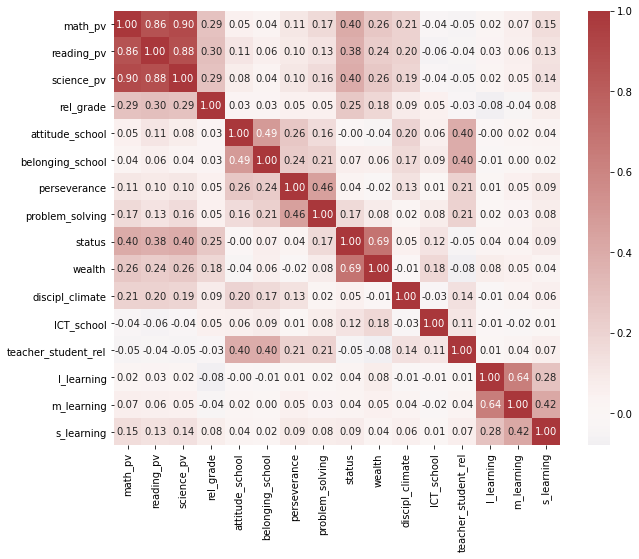

In [25]:
# correlation matrix numerical variables
plt.figure(figsize = [10, 8])
sb.heatmap(pisa_explore[num_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag', center = 0);

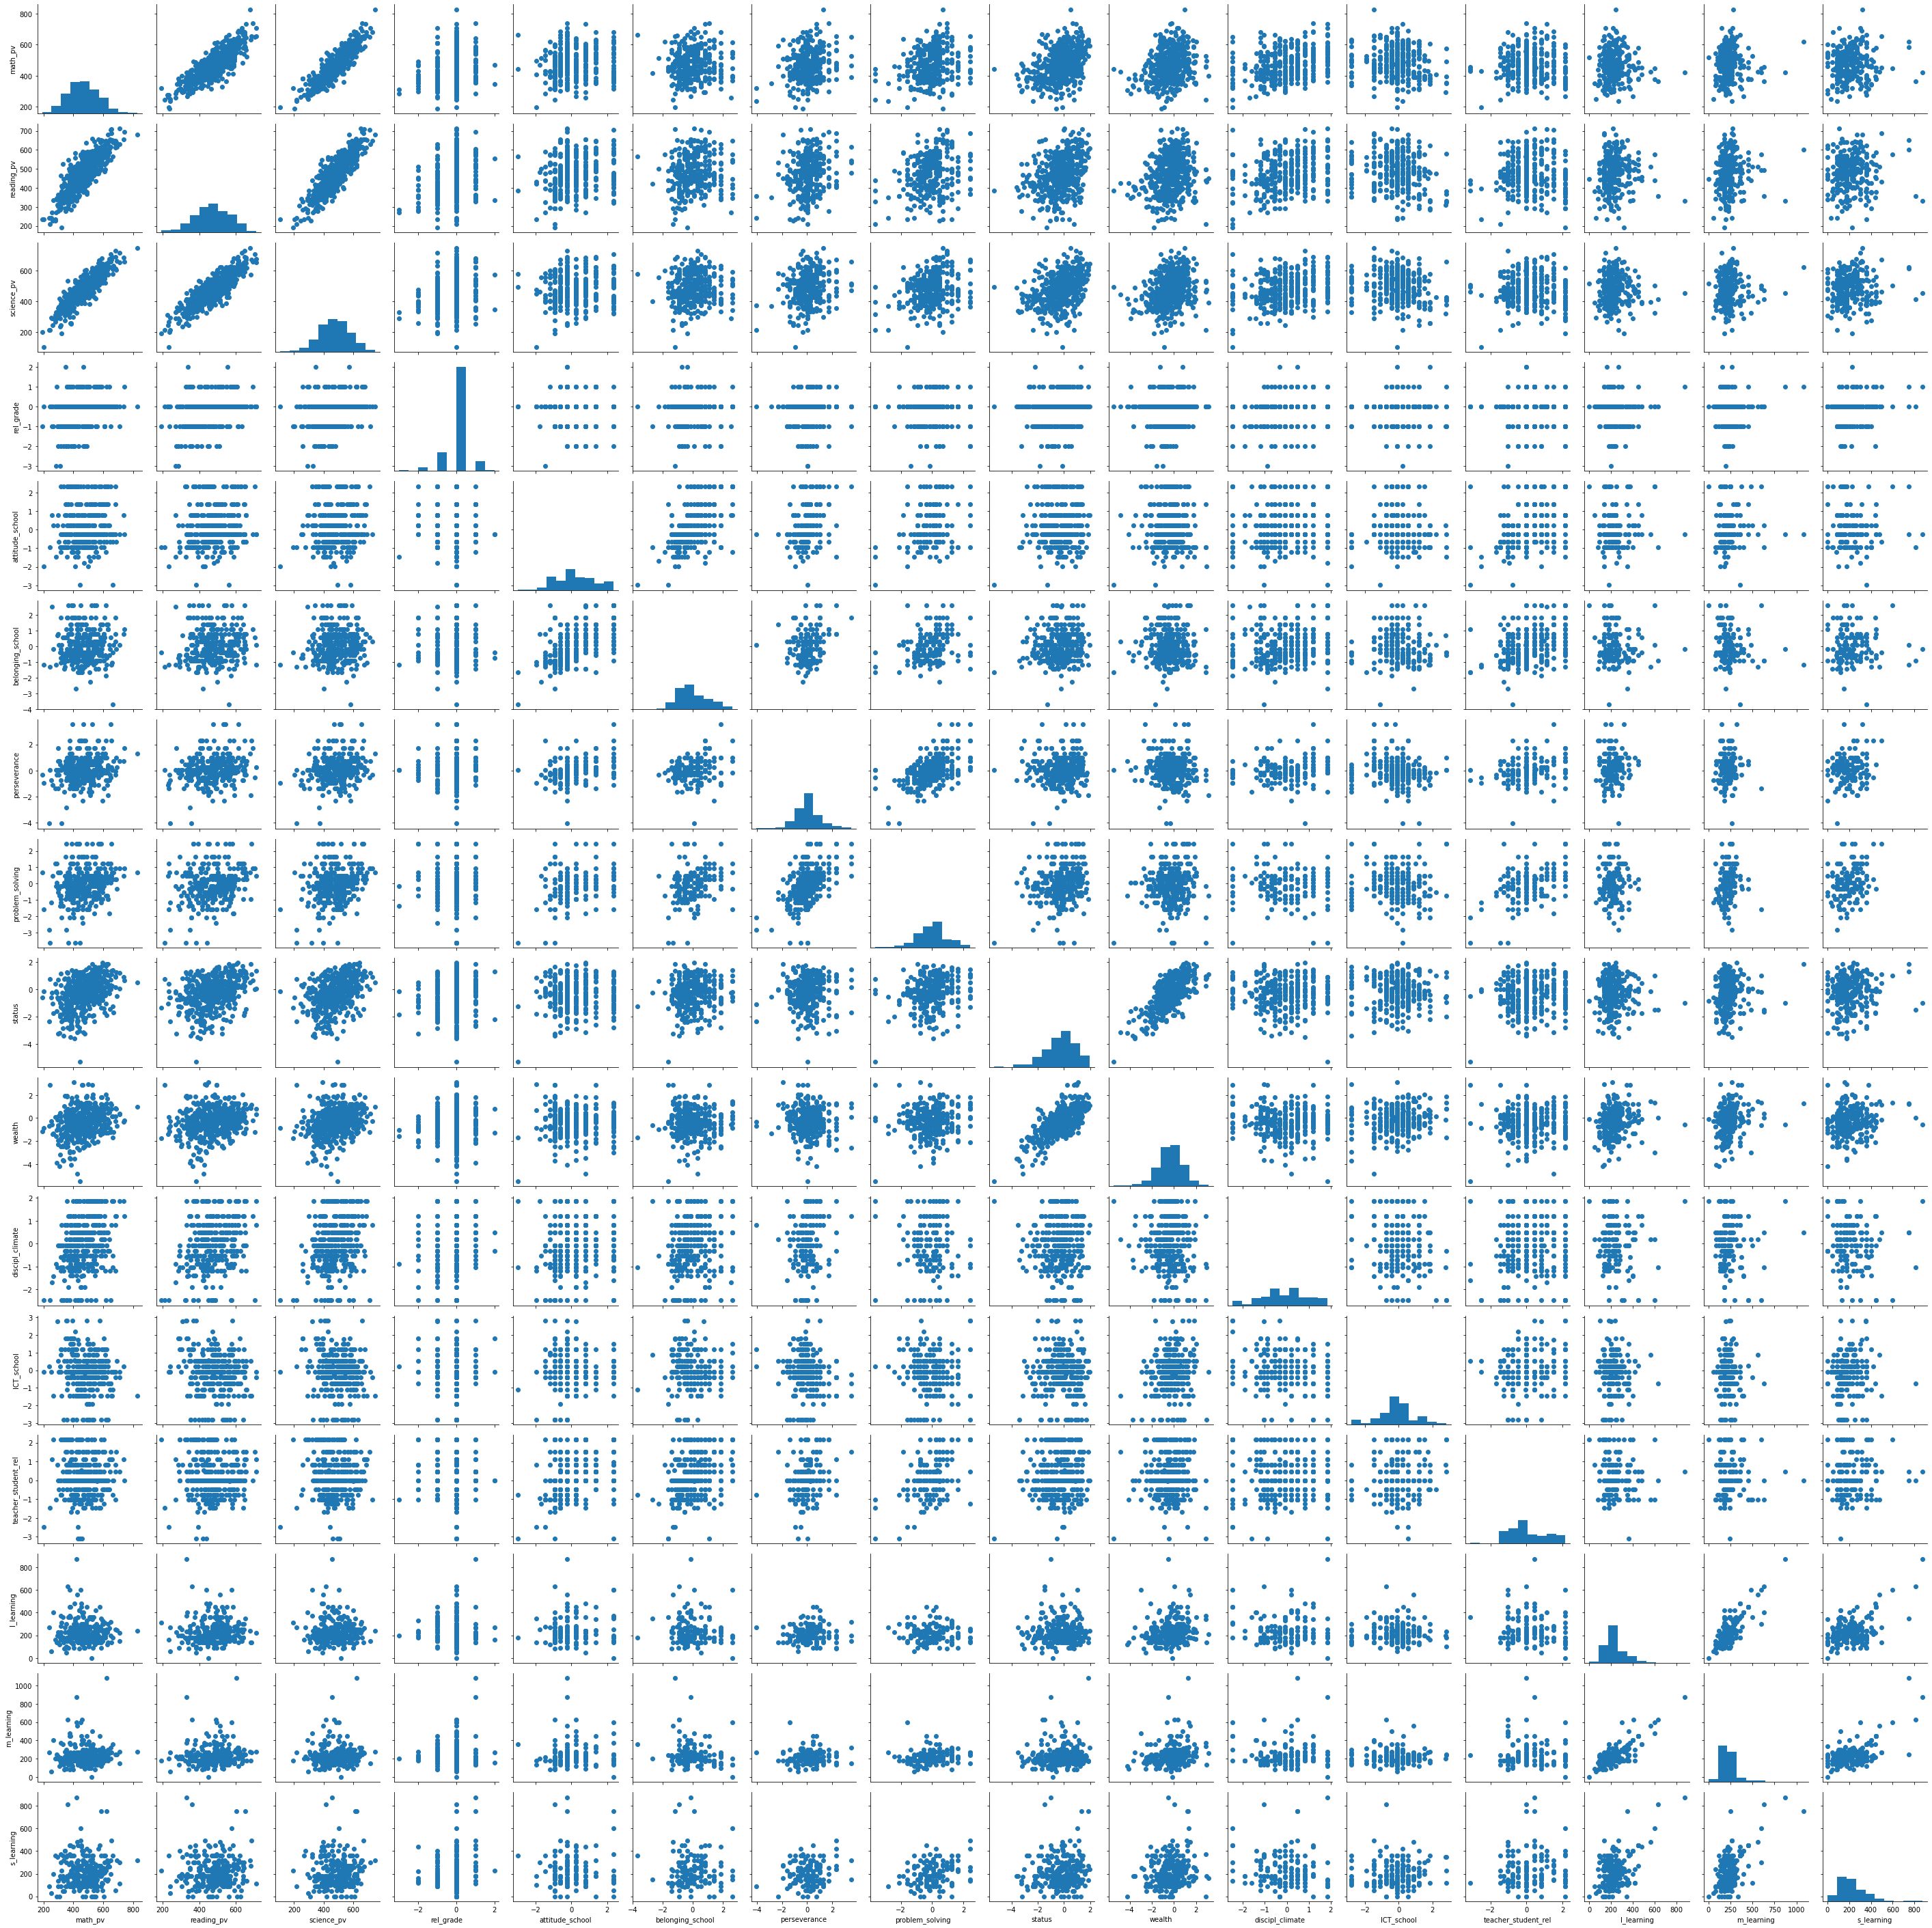

In [26]:
# plot matrix with sample of the dataset
g = sb.PairGrid(data = pisa_explore.sample(500), vars = num_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

It is not surprising to see the high correlation among the three PVs themselves. This means, students generally perform well at school and not in one isolated area. It is interesting to see that the three PVs correlate with almost none of the independent variables. The only noteable - but not strong - positive correlation can be observed with `status`. This index of economic, social and cultural status was constructed in the PISA study and takes into account aspects like parental education, parental occupation and home posessions (including books).\
Even the correlation between learning time and PV is very low, I will investigate this relationship in the next plot by using a log-transformation for the learning time, as done in the univariate plot above.

In [27]:
# Define function for scatter plots with log-transformation on x-axis
def plot_scatter_log(x,y):
    plt.scatter(pisa_explore[x], pisa_explore[y], alpha = .5)
    plt.xlabel(x);
    plt.ylabel(y);
    plt.xscale('log');
    plt.xticks([10, 20, 30, 50, 100, 200, 300, 500, 1000, 3000], ['10', '20', '30', '50', '100', '200', '300', '500 ','1000','3000']);
    plt.xlim((10, 3000));

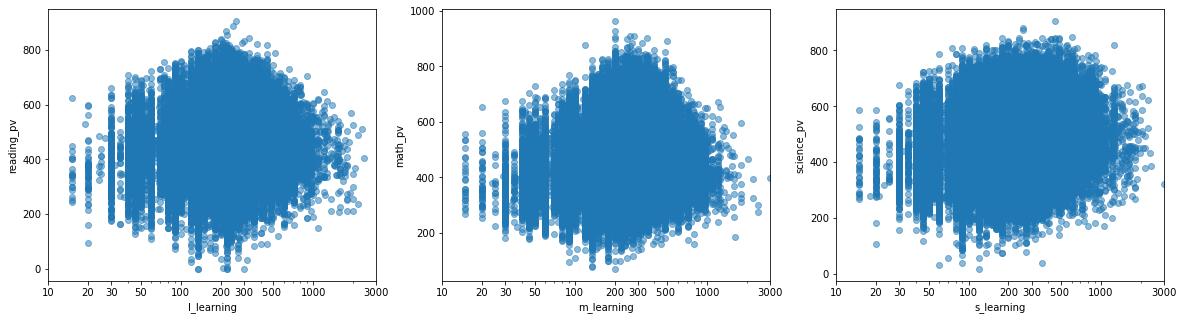

In [28]:
# learning time vs PVs with log-transformation
plt.figure(figsize = [20, 5])
# l_learning
plt.subplot(1,3,1)
plot_scatter_log('l_learning','reading_pv')
# m_learning
plt.subplot(1,3,2)
plot_scatter_log('m_learning','math_pv')
# s_learning
plt.subplot(1,3,3)
plot_scatter_log('s_learning','science_pv')

The scatterplots above show now correlation between learning times and PVs, even with logarithmic x-axes. An interesting detail can be seen at the lower end of the x-scale: here the learning times seem to be discrete with intervals of 15 minutes - so students seem to have answered the questionnaire with these uniform time intervals.

<Figure size 1440x1440 with 0 Axes>

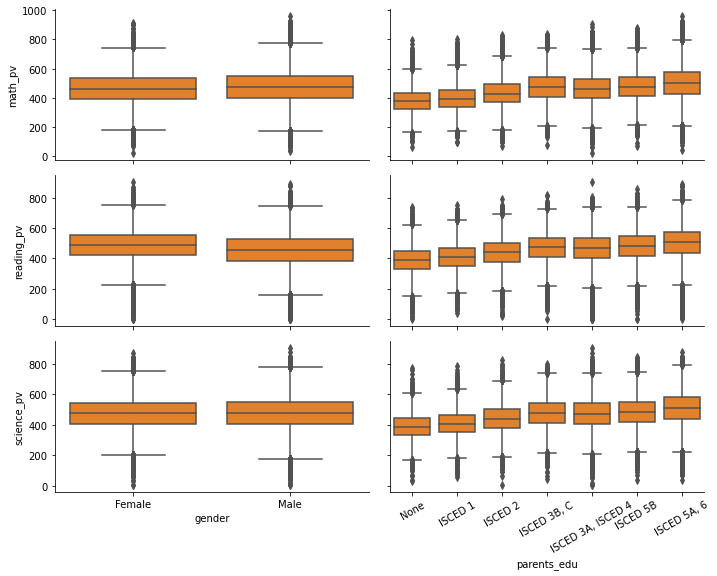

In [29]:
# dependent variables vs. gender and parents_edu
plt.figure(figsize = [20, 20]);
g = sb.PairGrid(data = pisa_explore, y_vars = ['math_pv', 'reading_pv', 'science_pv'], 
                x_vars = ['gender','parents_edu'], aspect = 2);
g.map(sb.boxplot, color = col);
plt.xticks(rotation = 30);

While there is only a very marginal difference between students' performance regarding gender, the plots on the right show that with increasing education of parents, the students' performance also increases. This means, a family's educational background has an influence on how a student performs at school.

In [30]:
def pv_country_plot(pv):
    country_order = pisa_explore.groupby('country').mean()[pv].sort_values(axis = 0, ascending = False).index
    plt.figure(figsize = [20, 5]);
    sb.pointplot(data = pisa_explore, x = 'country', y = pv, linestyles = '', color = col, order = country_order);
    plt.xticks(rotation = 90);

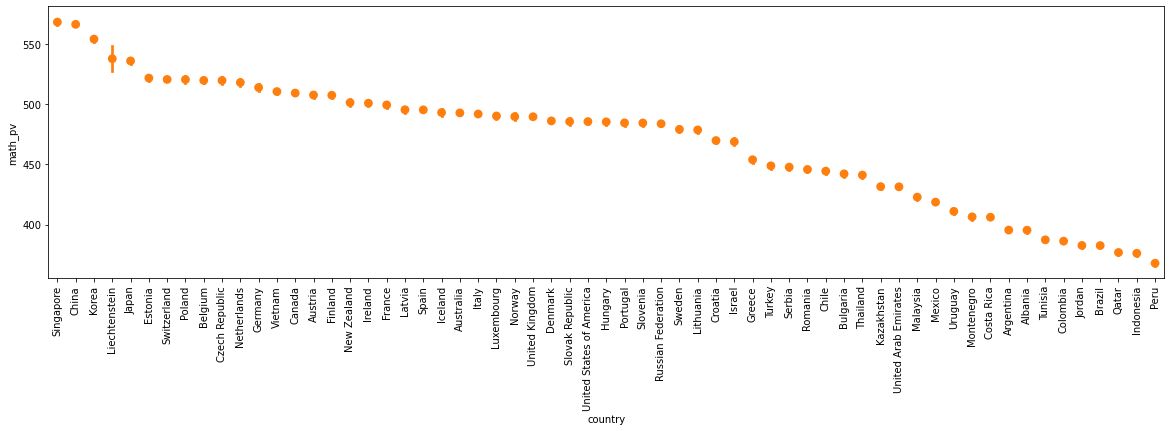

In [31]:
# math_pv per country
pv_country_plot('math_pv')

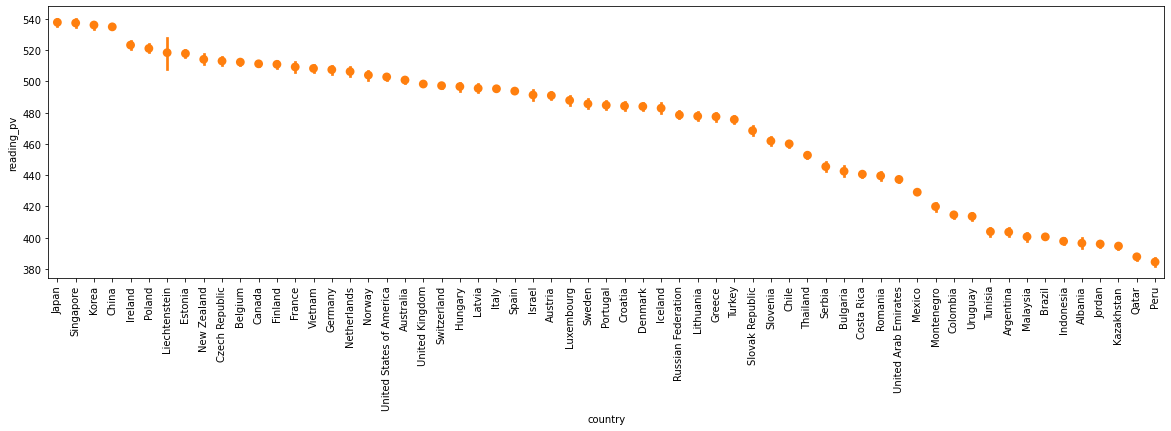

In [32]:
# reading_pv per country
pv_country_plot('reading_pv')

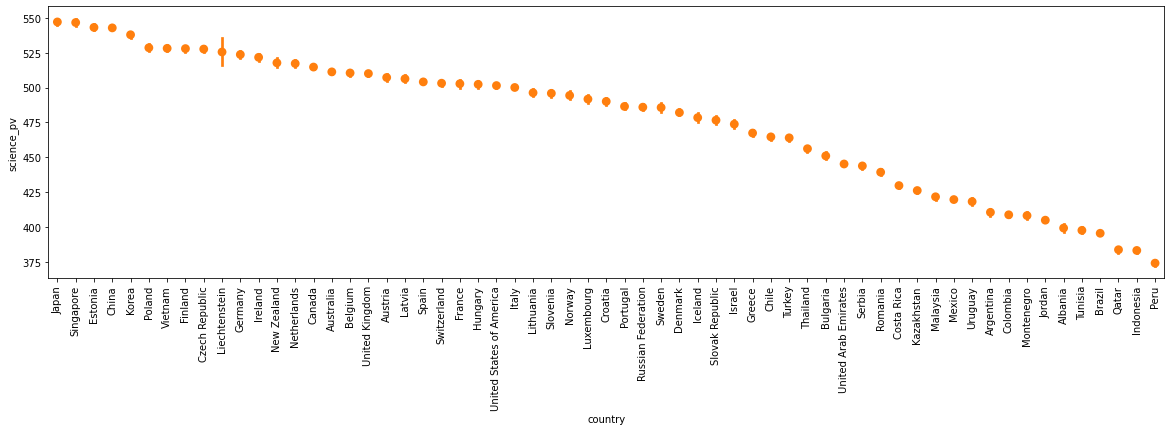

In [33]:
# science_pv per country
pv_country_plot('science_pv')

The above 3 plots are intersting, as they show the PISA ranking of the countries that took part. It would be better so show the three curves in one plot, though. I will do this in the multivariate part.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The only (slight) positive correlation between the PVs and independent variables was observed for the variable `status`. This is an index for economic, social and cultural background of students. Neither the learning times, nor the relatvie grades, nor the attitude towards school or personal motivation showed any noteable correlation. Also, it is apparent that students usually perform well in all three areas.\
Gender has almost no influence on how students perform. Males performed slightly better in mathematics and females in reading, but these differences were not significant.\
The education of parents, seems to affect how students perform. At least an increase in performance in all three areas can be observed with increasing education level of the parents. This means that the family background does determine how pupils perform at school.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The correlation matrix showed a slight positive correlation between the students' attitude towards school and the student-teacher relationship. Furhtermore, the learning-time variables were correlated among each other but not in the same way: learning times in mathematics and reading were more highly correlated than mathematics and science, which in turn was more highly correlated than reading and science.

## Multivariate Exploration

Before creating the multivariate plots, I want to accomplish two things:
* Create a new variable `performance` based on three quantiles of the PVs (I will use the math PV for simplicity) 
* Create a long-format data frame with a new variable `area` to enable plotting the three areas in one figure more easily

In [34]:
# performance variable
mask = pisa_explore.math_pv >= pisa_explore.math_pv.quantile(.66)
pisa_explore.loc[mask,'performance'] = 'high performance'
mask = (pisa_explore.math_pv < pisa_explore.math_pv.quantile(.66)) & (pisa_explore.math_pv >= pisa_explore.math_pv.quantile(.33))
pisa_explore.loc[mask,'performance'] = 'mid performance'
mask = pisa_explore.math_pv < pisa_explore.math_pv.quantile(.33)
pisa_explore.loc[mask,'performance'] = 'low performance'
# set to ordered categorical type
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ['low performance','mid performance','high performance'])
pisa_explore.loc[:,'performance'] = pisa_explore.loc[:,'performance'].astype(ordered_var)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [35]:
pisa_explore.head()

,math_pv,reading_pv,science_pv,gender,rel_grade,attitude_school,belonging_school,perseverance,problem_solving,status,parents_edu,wealth,country,discipl_climate,ICT_school,teacher_student_rel,l_learning,m_learning,s_learning,performance
1,406.8469,249.5762,341.7009,Female,0.0,-2.31,-1.18,-0.3407,0.0521,NaN,"ISCED 3A, ISCED 4",-2.92,Albania,1.85,NaN,-1.04,NaN,NaN,NaN,low performance
2,486.1427,406.2936,548.9929,Female,0.0,NaN,NaN,1.3116,-0.9492,NaN,"ISCED 5A, 6",0.69,Albania,NaN,NaN,NaN,315.0,270.0,90.0,mid performance
3,533.2684,401.2100,499.6643,Female,-1.0,NaN,NaN,0.9918,0.9383,NaN,"ISCED 5A, 6",-0.23,Albania,NaN,NaN,NaN,300.0,NaN,NaN,high performance
4,412.2215,547.3630,438.6796,Female,-1.0,NaN,NaN,NaN,NaN,NaN,"ISCED 5A, 6",-1.17,Albania,1.80,NaN,NaN,135.0,135.0,90.0,low performance
5,381.9209,311.7707,361.5628,Female,-1.0,1.38,2.63,1.0819,1.2387,NaN,"ISCED 3A, ISCED 4",-1.17,Albania,-0.08,NaN,-0.02,NaN,NaN,NaN,low performance


In [36]:
# long-format data frame
pisa_long = pd.melt(pisa_explore, id_vars=['country','parents_edu', 'performance', 'l_learning','m_learning','s_learning'], value_vars=['math_pv', 'reading_pv', 'science_pv'], 
                    var_name='area', value_name='pv', ignore_index=False)

In [37]:
# save the updated data frame
pisa_explore.to_csv('pisa_explore.csv', index = False)
# save the new data frame
pisa_long.to_csv('pisa_long.csv', index = False)

In my first multivariate plot I want to depict all three PVs by country in one figure.

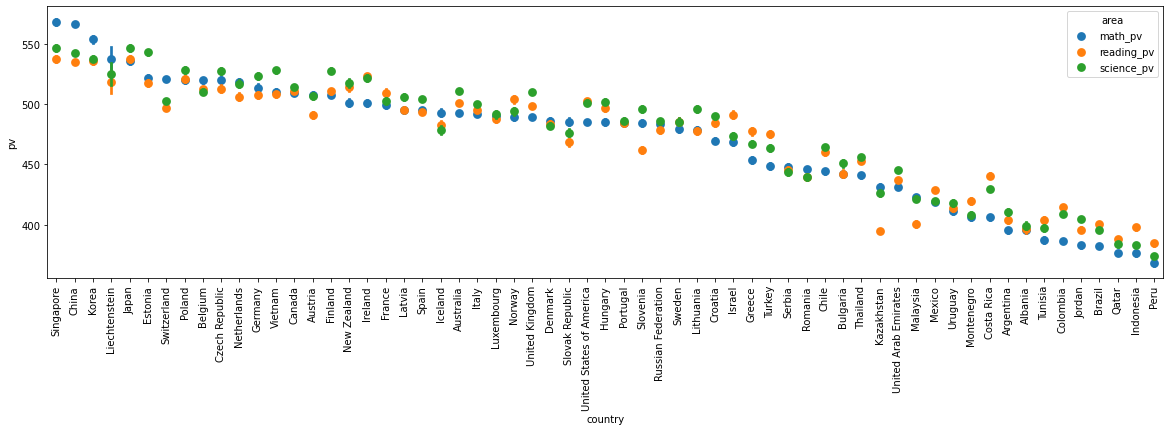

In [38]:
# plot all three areas by country in one figure
# order countries by math_pv
country_order = pisa_explore.groupby('country').mean().math_pv.sort_values(axis = 0, ascending = False).index
# plot
plt.figure(figsize = [20, 5]);
sb.pointplot(data = pisa_long, x = 'country', y = 'pv', hue = 'area', linestyles = '', order = country_order)
plt.xticks(rotation = 90);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


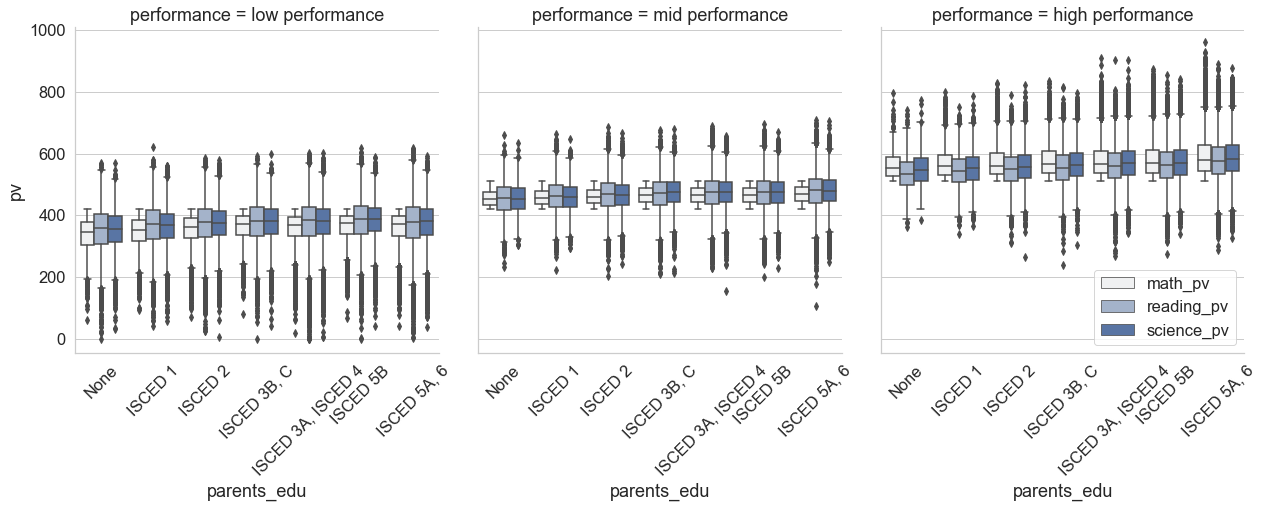

In [39]:
# plot PVs by parents education and performance
sb.set(font_scale = 1.5);
sb.set_style("whitegrid");
g = sb.FacetGrid(data = pisa_long, col = 'performance', height = 6);
g.map(sb.boxplot, 'parents_edu', 'pv','area');
[plt.setp(ax.get_xticklabels(), rotation = 45) for ax in g.axes.flat];
plt.legend();

It can be seen in this plot that the increase in performance with parents' education is greatest for students in the top range of performance and it is most prevalent for reading and science. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The ranking of countires is not the same for all three areas but quite similar. The plot nicely shows students in each country performed in the three areas. Interestingly, in the four top countries students performed best in maths, while at the other end of the scale they performed worst in maths.

### Were there any interesting or surprising interactions between features?

Plotting the PV distributions by parents education shows and separated the newly added performance category reveals something I did not expect: it is more rather in the high performing countries that the parents education had an influence on the PVs. This was especially clear for reading and science. In countries with low PISA performance the education level of parents seems to have almost no influence. 